In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [7]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
X = df.iloc[:,1:].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 11), (836, 11), (3341,), (836,))

In [6]:
X_tr = X_tr.astype('float32')
# X_tr.info()
y_tr = y_tr.astype('float32')
X_te = X_te.astype('float32')
y_te = y_te.astype('float32')

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [12]:
X[:5]

array([[ 0.    ,  0.    ,  1.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 0.    ,  0.    ,  1.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 1.    ,  0.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 0.    ,  0.    ,  1.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  1.    ,  0.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

## model 2 from FFNN_01

In [10]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [83]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [84]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 248us/sample - loss: 91.9383 - mse: 91.9383 - val_loss: 58.6622 - val_mse: 58.6622
Epoch 2/100
2672/2672 [==============================] - 0s 48us/sample - loss: 29.3412 - mse: 29.3412 - val_loss: 13.4319 - val_mse: 13.4319
Epoch 3/100
2672/2672 [==============================] - 0s 39us/sample - loss: 11.8317 - mse: 11.8317 - val_loss: 9.3785 - val_mse: 9.3785
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 8.9401 - mse: 8.9401 - val_loss: 7.1965 - val_mse: 7.1965
Epoch 5/100
2672/2672 [==============================] - 0s 36us/sample - loss: 7.7218 - mse: 7.7218 - val_loss: 6.3351 - val_mse: 6.3351
Epoch 6/100
2672/2672 [==============================] - 0s 41us/sample - loss: 6.9780 - mse: 6.9780 - val_loss: 5.9475 - val_mse: 5.9475
Epoch 7/100
2672/2672 [==============================] - 0s 45us/sample - loss: 6.5784 - mse: 6.5784 - val_loss: 5

In [85]:
y_pred = model.predict(X_te)

In [86]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [87]:
score

[4.757182445252341, 4.757182]

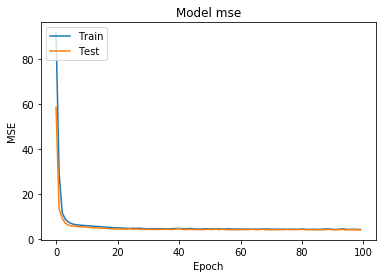

In [88]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 3-1 change dimension

In [22]:
model = Sequential()
model.add(Dense(32, input_shape=(11,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [25]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 273us/sample - loss: 37.8484 - mae: 4.8708 - val_loss: 3.0806 - val_mae: 1.6833
Epoch 2/100
2672/2672 [==============================] - 0s 33us/sample - loss: 2.1000 - mae: 1.1785 - val_loss: 0.7600 - val_mae: 0.8002
Epoch 3/100
2672/2672 [==============================] - 0s 32us/sample - loss: 0.2514 - mae: 0.4001 - val_loss: 0.1017 - val_mae: 0.2816
Epoch 4/100
2672/2672 [==============================] - 0s 36us/sample - loss: 0.0415 - mae: 0.1546 - val_loss: 0.0217 - val_mae: 0.1093
Epoch 5/100
2672/2672 [==============================] - 0s 28us/sample - loss: 0.0227 - mae: 0.1132 - val_loss: 0.0188 - val_mae: 0.1001
Epoch 6/100
2672/2672 [==============================] - 0s 39us/sample - loss: 0.0190 - mae: 0.1031 - val_loss: 0.0157 - val_mae: 0.0922
Epoch 7/100
2672/2672 [==============================] - 0s 42us/sample - loss: 0.0158 - mae: 0.0930 - val_loss: 0.0130 - v

2672/2672 [==============================] - 0s 32us/sample - loss: 3.0409e-04 - mae: 0.0120 - val_loss: 2.4866e-04 - val_mae: 0.0115
Epoch 58/100
2672/2672 [==============================] - 0s 38us/sample - loss: 3.0608e-04 - mae: 0.0120 - val_loss: 2.6470e-04 - val_mae: 0.0118
Epoch 59/100
2672/2672 [==============================] - 0s 30us/sample - loss: 3.0645e-04 - mae: 0.0121 - val_loss: 2.3979e-04 - val_mae: 0.0113
Epoch 60/100
2672/2672 [==============================] - 0s 36us/sample - loss: 2.9410e-04 - mae: 0.0117 - val_loss: 2.5319e-04 - val_mae: 0.0116
Epoch 61/100
2672/2672 [==============================] - 0s 36us/sample - loss: 2.9431e-04 - mae: 0.0117 - val_loss: 2.3765e-04 - val_mae: 0.0114
Epoch 62/100
2672/2672 [==============================] - 0s 36us/sample - loss: 2.9123e-04 - mae: 0.0115 - val_loss: 2.4308e-04 - val_mae: 0.0115
Epoch 63/100
2672/2672 [==============================] - 0s 37us/sample - loss: 2.8599e-04 - mae: 0.0114 - val_loss: 2.7892e-04 - 

In [26]:
y_pred = model.predict(X_te)

In [27]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [28]:
score

[0.00020053122925369344, 0.011253129]

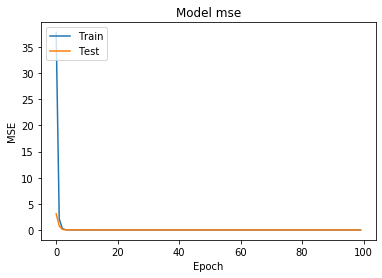

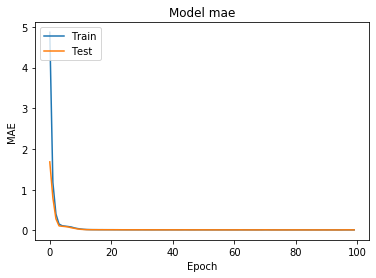

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 3-2 change filter

In [31]:
model = Sequential()
model.add(Dense(32, input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Flatten())
model.add(Dense(1))

In [32]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [34]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 267us/sample - loss: 20.7729 - mae: 3.6983 - val_loss: 0.2162 - val_mae: 0.3809
Epoch 2/100
2672/2672 [==============================] - 0s 43us/sample - loss: 1.0607 - mae: 0.8688 - val_loss: 0.1828 - val_mae: 0.3316
Epoch 3/100
2672/2672 [==============================] - 0s 48us/sample - loss: 0.1844 - mae: 0.3193 - val_loss: 0.0897 - val_mae: 0.2440
Epoch 4/100
2672/2672 [==============================] - 0s 38us/sample - loss: 0.0706 - mae: 0.2103 - val_loss: 0.0479 - val_mae: 0.1617
Epoch 5/100
2672/2672 [==============================] - 0s 27us/sample - loss: 0.0396 - mae: 0.1523 - val_loss: 0.0267 - val_mae: 0.1225
Epoch 6/100
2672/2672 [==============================] - 0s 46us/sample - loss: 0.0226 - mae: 0.1137 - val_loss: 0.0172 - val_mae: 0.0960
Epoch 7/100
2672/2672 [==============================] - 0s 28us/sample - loss: 0.0150 - mae: 0.0906 - val_loss: 0.0122 - v

2672/2672 [==============================] - 0s 48us/sample - loss: 2.1576e-04 - mae: 0.0102 - val_loss: 2.1400e-04 - val_mae: 0.0101
Epoch 58/100
2672/2672 [==============================] - 0s 44us/sample - loss: 2.0136e-04 - mae: 0.0097 - val_loss: 2.3044e-04 - val_mae: 0.0112
Epoch 59/100
2672/2672 [==============================] - 0s 30us/sample - loss: 2.1485e-04 - mae: 0.0102 - val_loss: 2.0239e-04 - val_mae: 0.0098
Epoch 60/100
2672/2672 [==============================] - 0s 26us/sample - loss: 2.0189e-04 - mae: 0.0097 - val_loss: 1.9608e-04 - val_mae: 0.0101
Epoch 61/100
2672/2672 [==============================] - 0s 24us/sample - loss: 2.0101e-04 - mae: 0.0098 - val_loss: 1.8400e-04 - val_mae: 0.0095
Epoch 62/100
2672/2672 [==============================] - 0s 25us/sample - loss: 2.2056e-04 - mae: 0.0105 - val_loss: 2.5963e-04 - val_mae: 0.0115
Epoch 63/100
2672/2672 [==============================] - 0s 26us/sample - loss: 2.4012e-04 - mae: 0.0111 - val_loss: 2.0050e-04 - 

In [35]:
y_pred = model.predict(X_te)

In [36]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
score

[8.514824427934987e-05, 0.006290794]

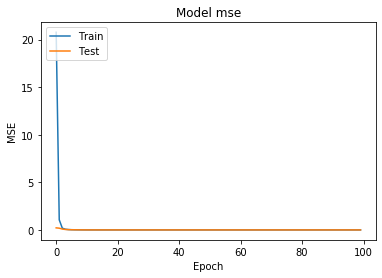

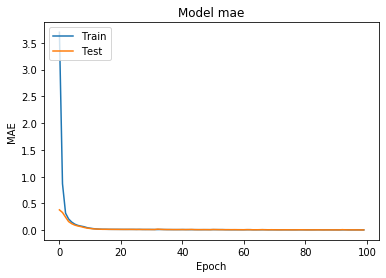

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()